# Initial and Boundary Value Problems
## September 15th, 2022
### Overview: Using scipy's solve_ivp and solve_bvp to solve initial value ODEs and boundary ODEs

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use `solve_ivp` to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

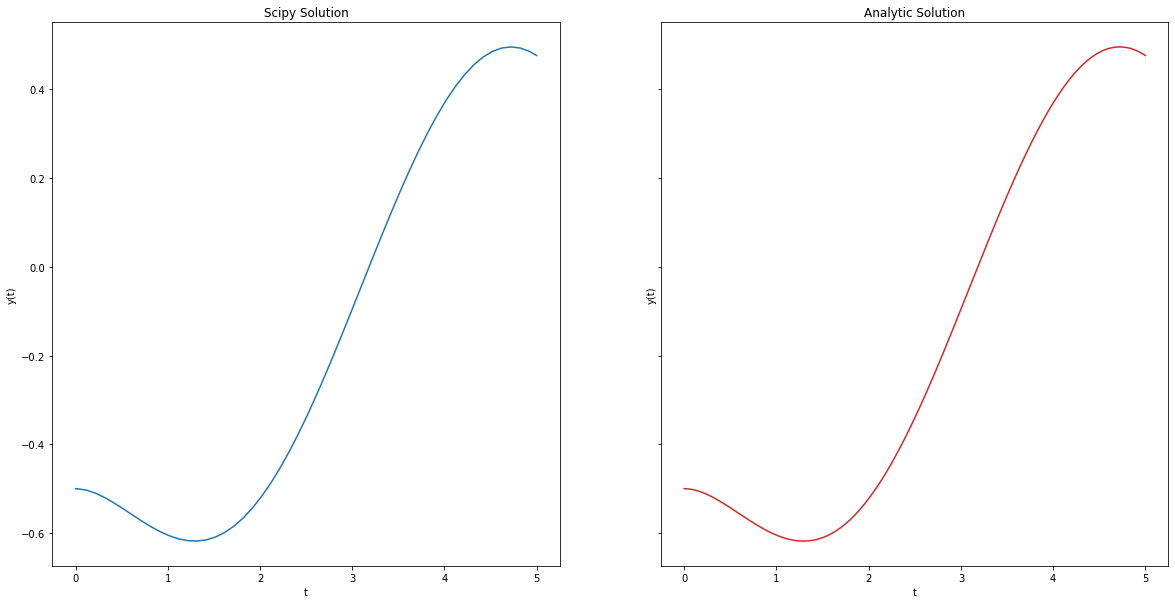

In [2]:
plt.rcParams["figure.figsize"] = (20,10) #make plots big
#define ode
def ode(t,y):
    """defines ode system"""
    return np.array([y[1],np.sin(t)+y[0]])

#time span
t_span = (0,5)

#initial conditions
y0 = np.array([ -0.5,0  ])

#get solution via scipy 
sol = solve_ivp(ode,t_span,y0,max_step=0.1)

#analytic solution
ana_sol = lambda t: -0.5 * (np.exp(-t) + np.sin(t))

#plot solutions:
fig, ax = plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True)

#scipy sol
ax[0].plot(sol.t,sol.y[0]) 
ax[0].set_xlabel('t') 
ax[0].set_ylabel('y(t)') 
ax[0].set_title('Scipy Solution')

#create a linspace for time
tlinspace = np.linspace(0,5,500)

#plot analytic solution
ax[1].plot(tlinspace,ana_sol(tlinspace),color='tab:red') 
ax[1].set_xlabel('t') 
ax[1].set_ylabel('y(t)') 
ax[1].set_title('Analytic Solution')
plt.show()

### Problem 2

Use `solve_bvp` to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

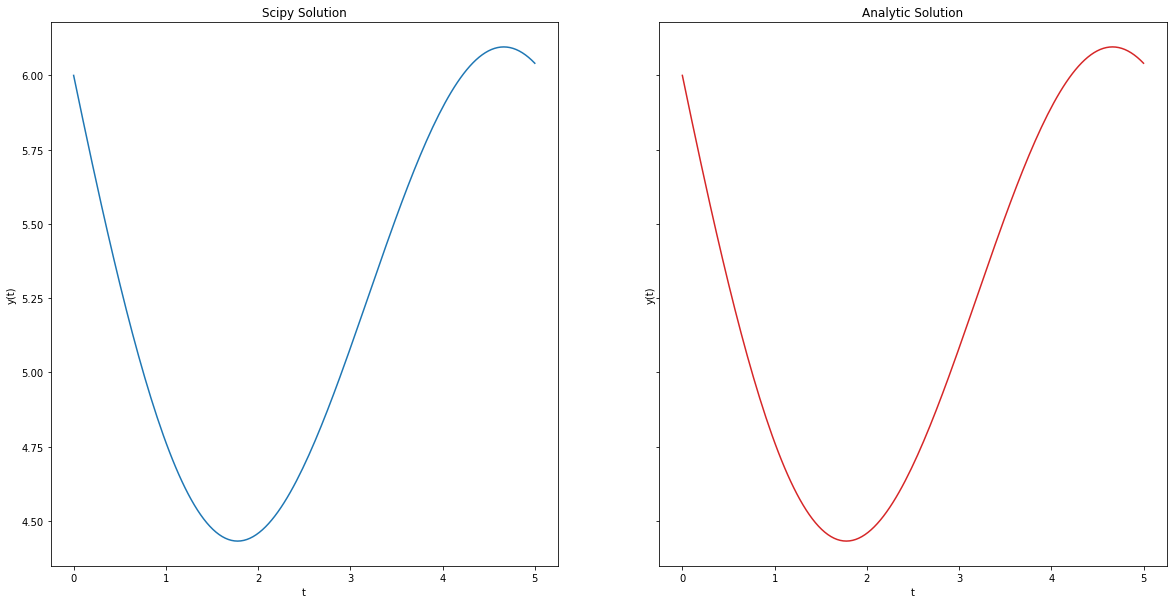

In [3]:
#create ode system
def ode(t,y):
    return np.array([ y[1], -0.25*np.exp(-0.5*t) + np.sin(t) - np.cos(t) - y[1]  ])

#boundary conditions
def bc(ya,yb):
    return np.array([ ya[0]-6, yb[1] + 0.324705   ])

#time domain
t_span = np.linspace(0,5,150)

#initial guess
y0 = np.ones((2,150))

#solve
sol = solve_bvp(ode,bc,t_span,y0)
#analytic solution
ana_sol = lambda t: np.exp(-0.5*t) - np.sin(t) + 5

#plot solutions:
fig, ax = plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True)

#scipy sol
ax[0].plot(sol.x,sol.y[0]) 
ax[0].set_xlabel('t') 
ax[0].set_ylabel('y(t)') 
ax[0].set_title('Scipy Solution')

#plot analytic solution
ax[1].plot(t_span,ana_sol(t_span),color='tab:red') 
ax[1].set_xlabel('t') 
ax[1].set_ylabel('y(t)') 
ax[1].set_title('Analytic Solution')
plt.show()

### Problem 3

Use `solve_bvp` to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

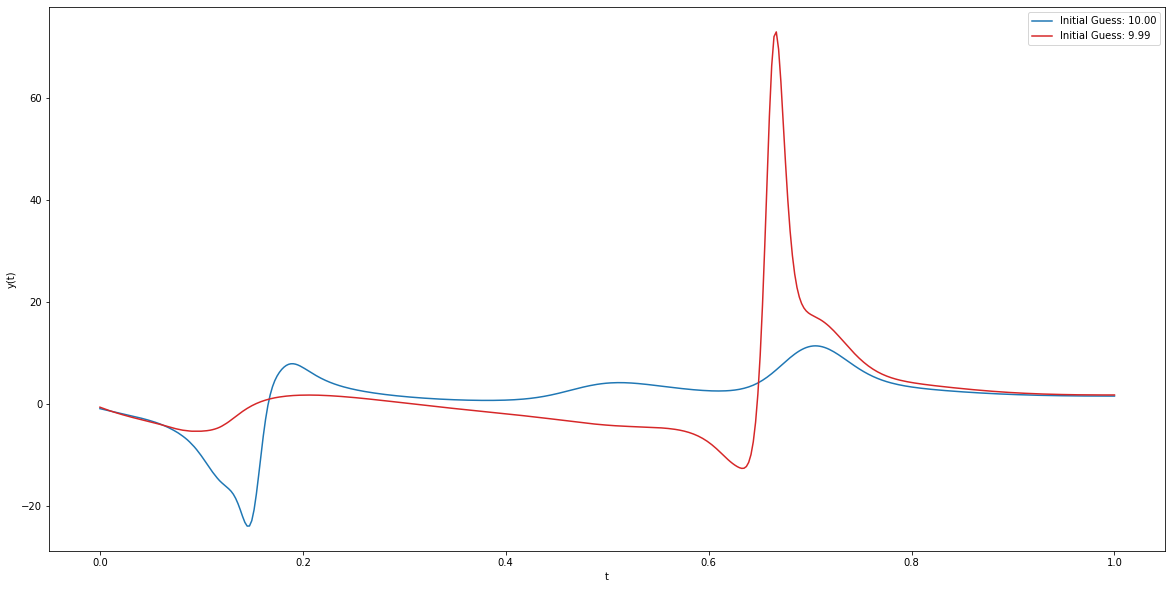

In [4]:
#create ode system
def ode(t,y):
    return np.array([y[1], (1-y[1])*(10*y[0])  ])

#boundary
def bc(ya,yb):
    return np.array([ya[0]+1, yb[0]-1.5])

#time domain
t_span = np.linspace(0,1,50)

#initial guesses
y0_0 = np.full((2,50),10.)
y0_1 = np.full((2,50),9.99)

#solve both
sol_0 = solve_bvp(ode,bc,t_span,y0_0)
sol_1 = solve_bvp(ode,bc,t_span,y0_1)

#plot solutions:
plt.plot(sol_0.x,sol_0.y[0],label='Initial Guess: 10.00') 
plt.plot(sol_1.x,sol_1.y[0],color='tab:red',label='Initial Guess: 9.99') 
plt.xlabel('t') 
plt.ylabel('y(t)') 
plt.legend()
plt.show()

### Problem 4
Use `solve_ivp` to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

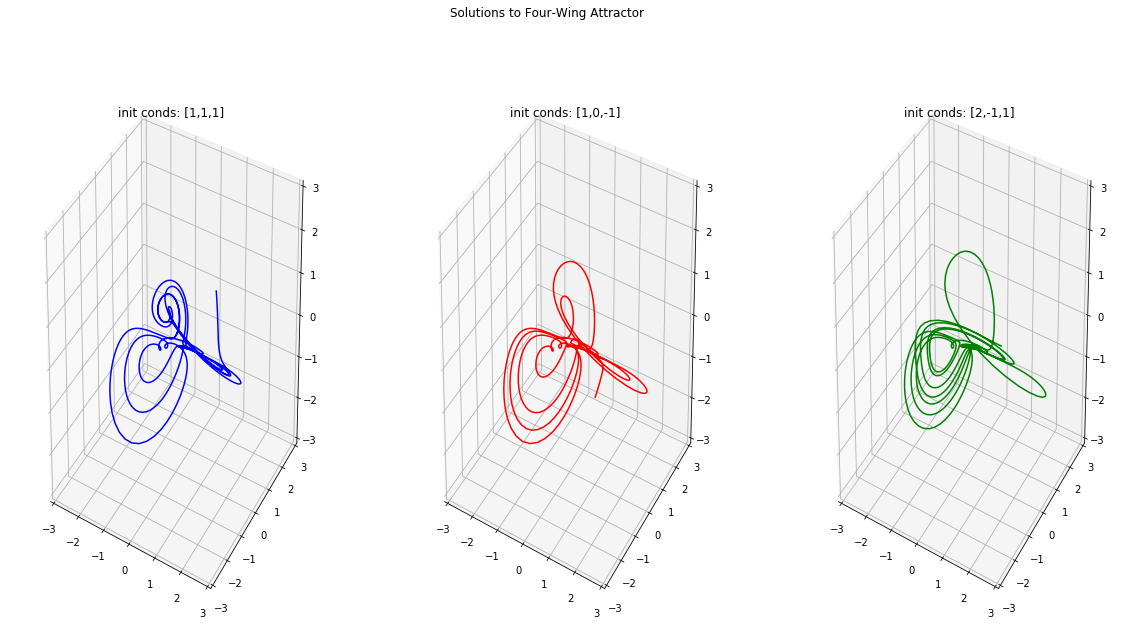

In [5]:
#define constant variables
a = 0.2
b = 0.01
c = -0.4

#defining s = [x, y, z].T

#create ode system
def ode(t,s):
    return np.array([ a*s[0] + s[1]*s[2], b*s[0] + c*s[1] - s[0]*s[2],  -s[2] - s[0]*s[1]   ])

#time span
t_span = (0,200)

#initial conditions
i1 = np.array([ 1,1,1  ])
i2 = np.array([1,0,-1])
i3 = np.array([2,-1,1])


#get solution via scipy 
sol1 = solve_ivp(ode,t_span,i1,max_step=0.1)
sol2 = solve_ivp(ode,t_span,i2,max_step=0.1)
sol3 = solve_ivp(ode,t_span,i3,max_step=0.1)

#make figure and 3d axis
fig = plt.figure()
fig.suptitle("Solutions to Four-Wing Attractor")
ax1  = fig.add_subplot(131, projection='3d')
ax2  = fig.add_subplot(132, projection='3d')
ax3  = fig.add_subplot(133, projection='3d')

#set window limits
ax1.set_xlim(-3.,3.)
ax1.set_ylim(-3.,3.)
ax1.set_zlim(-3.,3.)
ax2.set_xlim(-3.,3.)
ax2.set_ylim(-3.,3.)
ax2.set_zlim(-3.,3.)
ax3.set_xlim(-3.,3.)
ax3.set_ylim(-3.,3.)
ax3.set_zlim(-3.,3.)

#plot
ax1.set_title('init conds: [1,1,1]')
ax2.set_title('init conds: [1,0,-1]')
ax3.set_title('init conds: [2,-1,1]')
ax1.plot3D(sol1.y[0],sol1.y[1],sol1.y[2],color='b')
ax2.plot3D(sol2.y[0],sol2.y[1],sol2.y[2],color='r')
ax3.plot3D(sol3.y[0],sol3.y[1],sol3.y[2],color='g')
plt.show()

## Problem 5

Write a function that uses `solve_bvp` to find $\psi$ and $E$ that are solutions to the Schroedinger equation for the potential $U(x)=x^2$ and with boundary conditions $\psi(-1)=\psi(1)=0, \psi'(-1)=1$.
By varying your initial guess for $E$, use your function to find solutions for several different values of $E$, and plot them together.

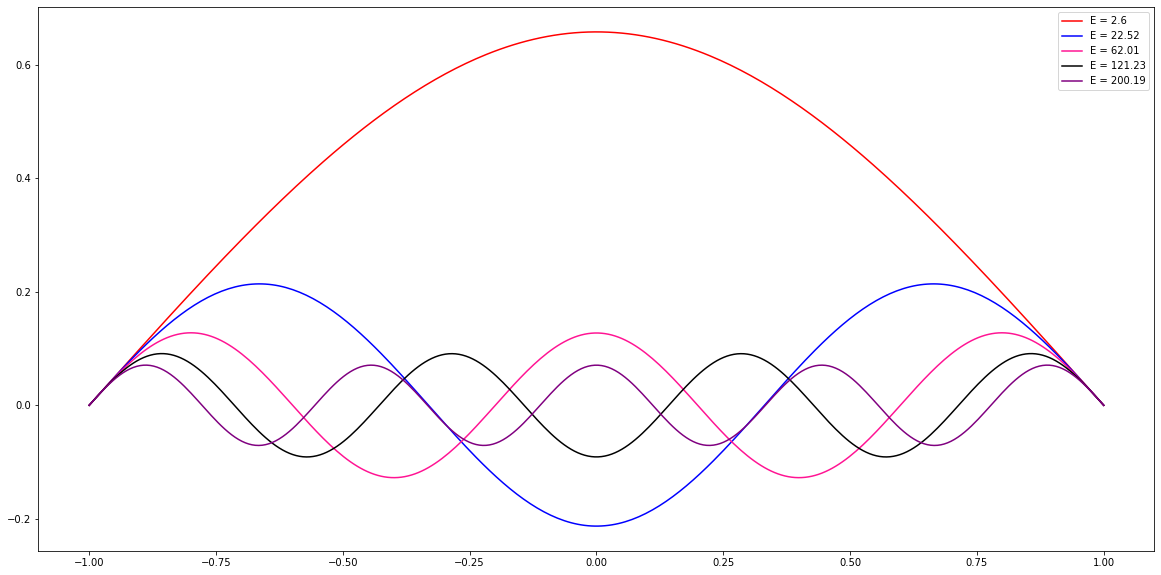

In [6]:
#create ode system
def ode(x,phi,p):
    #p = [E]
    #h**2/m = 1
    return np.array([ 
        phi[1], 
        -(p[0]*phi[0] - (x**2)*phi[0])
    ])

#create boundary conditions
def bc(phia,phib,p):
    return np.array([ 
        phia[0] + 0, 
        phib[0] + 0, 
        phia[1] - 1   
    ])

#make a linspace for x
x = np.linspace(-1,1,300) 

#initial guess for phi is 1s vector
phi_guess = np.ones((2,300)) 

#guesses for p as in the lab file bc I dont feel like being creative today
p_guess1 = [2.6] 
p_guess2 = [22.52] 
p_guess3 = [62.01] 
p_guess4 = [121.23] 
p_guess5 = [200.19] 

#Solve for each p_guess
sol1 = solve_bvp(ode,bc,x,phi_guess,p=p_guess1)
sol2 = solve_bvp(ode,bc,x,phi_guess,p=p_guess2)
sol3 = solve_bvp(ode,bc,x,phi_guess,p=p_guess3)
sol4 = solve_bvp(ode,bc,x,phi_guess,p=p_guess4)
sol5 = solve_bvp(ode,bc,x,phi_guess,p=p_guess5)

#plot each solution
plt.plot(sol1.x,sol1.y[0],color='r',label='E = 2.6')
plt.plot(sol2.x,sol2.y[0],color='b',label='E = 22.52')
plt.plot(sol3.x,sol3.y[0],color='deeppink',label='E = 62.01')
plt.plot(sol4.x,sol4.y[0],color='k',label='E = 121.23')
plt.plot(sol5.x,sol5.y[0],color='purple',label='E = 200.19')
plt.legend()
plt.show()